### 차트 작성 시 한글 깨짐 방지를 위한 koreanize-matplotlib 설치

In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.7 MB/s eta 0:00:00


### 라이브러리 import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 로드 및 확인

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# 타겟 변수 확인 (target: 0=정상, 1=당뇨병)
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


### 2. 데이터 전처리 및 분할

In [7]:
# Feature(X)와 Target(y) 분리
X = df.drop('target', axis=1)
y = df['target']

# 학습용/테스트용 데이터 분할 (8:2)
# stratify=y: 타겟 변수의 클래스 비율을 유지하며 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"학습 데이터: {X_train.shape}")
print(f"테스트 데이터: {X_test.shape}")

학습 데이터: (455, 30)
테스트 데이터: (114, 30)


### 3. 모델 학습 및 예측

In [8]:
# max_iter=1000: 수렴을 위해 반복 횟수 충분히 설정
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(X_test)

### 3. 혼동 행렬 (Confusion Matrix) 분석

In [9]:
# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 값 추출 (TP, TN, FP, FN)
# sklearn의 confusion_matrix는 [[TN, FP], [FN, TP]] 순서로 반환함
tn, fp, fn, tp = cm.ravel()

print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp} (Type I Error)")
print(f"False Negative (FN): {fn} (Type II Error)")
print(f"True Positive (TP): {tp}")

True Negative (TN): 40
False Positive (FP): 2 (Type I Error)
False Negative (FN): 2 (Type II Error)
True Positive (TP): 70


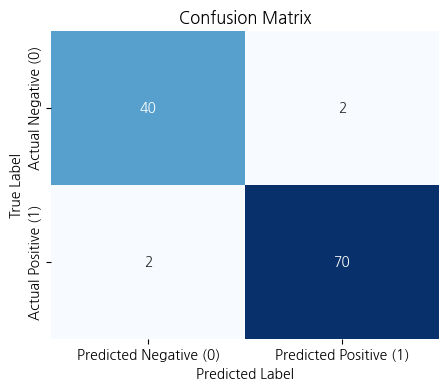

In [10]:
# 혼동 행렬 시각화
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### 4. 핵심 성능 지표

In [11]:
# 정확도 (Accuracy): 전체 중 정확히 예측한 비율
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 (Accuracy) : {accuracy:.4f}")

# 정밀도 (Precision): TP / (TP + FP)
# 모델이 Positive라고 예측한 것 중 실제 Positive의 비율
precision = precision_score(y_test, y_pred)
print(f"정밀도 (Precision): {precision:.4f}")

# 재현율 (Recall): TP / (TP + FN)
# 실제 Positive인 것 중 모델이 정확히 예측한 비율
recall = recall_score(y_test, y_pred)
print(f"재현율 (Recall)   : {recall:.4f}")

# F1-Score: 정밀도와 재현율의 조화 평균
f1 = f1_score(y_test, y_pred)
print(f"F1-Score          : {f1:.4f}")

정확도 (Accuracy) : 0.9649
정밀도 (Precision): 0.9722
재현율 (Recall)   : 0.9722
F1-Score          : 0.9722
